In [1]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

import pandas
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD

from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

import tqdm

%matplotlib inline

Using TensorFlow backend.



# Load Dataset
-

In [2]:
# load dataset
dataframe = pandas.read_csv("iris.csv", header=None)
dataset = dataframe.values
dataset = shuffle(dataset)

In [3]:
dataset

array([[6.1, 3.0, 4.9, 1.8, 'virginica'],
       [4.4, 3.2, 1.3, 0.2, 'setosa'],
       [5.5, 2.4, 3.8, 1.1, 'versicolor'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [4.4, 3.0, 1.3, 0.2, 'setosa'],
       [6.7, 3.1, 4.7, 1.5, 'versicolor'],
       [6.4, 3.2, 5.3, 2.3, 'virginica'],
       [5.5, 2.5, 4.0, 1.3, 'versicolor'],
       [6.9, 3.2, 5.7, 2.3, 'virginica'],
       [5.5, 2.4, 3.7, 1.0, 'versicolor'],
       [6.1, 2.9, 4.7, 1.4, 'versicolor'],
       [5.7, 2.8, 4.1, 1.3, 'versicolor'],
       [5.1, 3.8, 1.6, 0.2, 'setosa'],
       [6.5, 3.0, 5.8, 2.2, 'virginica'],
       [6.6, 2.9, 4.6, 1.3, 'versicolor'],
       [6.0, 3.4, 4.5, 1.6, 'versicolor'],
       [7.0, 3.2, 4.7, 1.4, 'versicolor'],
       [6.0, 2.7, 5.1, 1.6, 'versicolor'],
       [5.5, 2.3, 4.0, 1.3, 'versicolor'],
       [6.7, 3.1, 4.4, 1.4, 'versicolor'],
       [5.0, 3.3, 1.4, 0.2, 'setosa'],
       [5.8, 2.7, 3.9, 1.2, 'versicolor'],
       [6.7, 3.0, 5.0, 1.7, 'versicolor'],
       [5.7, 3.0, 4.2, 1.2, 'versic

# Split dataset in input [X] and output [Y]
-

In [4]:
# X contains four columns
X = dataset[:,0:4].astype(float)
# Y contains 5th column; the labels
Y = dataset[:,4]

In [6]:
Y

array(['virginica', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'versicolor',
       'virginica', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'setosa', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', '

In [7]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [8]:
dummy_y

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0

# Create Test set and Training set
-

In [9]:
# create test and train set
testSize = 50
X_test = X[0:testSize,:]
X_train = X[testSize::,:]
Y_test = dummy_y[0:testSize,:]
Y_train = dummy_y[testSize::,:]

# Create Neural Net
-

In [22]:
# create Neural Network named bob
bob = Sequential()
bob.add(Dense(8, input_dim=4, activation='relu'))
bob.add(Dense(16, activation='relu'))
bob.add(Dense(8, activation='relu'))
bob.add(Dense(3, activation='softmax'))

# configure optimizer
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.25, nesterov=True)

# Compile bob
#bob.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
bob.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])


100%|██████████| 501/501 [02:31<00:00,  3.31it/s]


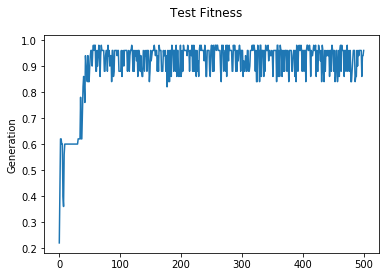

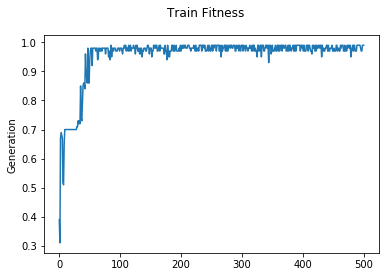

test: 0.94
train: 0.99


In [23]:
fitness_arr = []
fitness_train_arr = []
gen_arr = []

epoch_num = 1
tot_runs = 500

for generation in tqdm.trange(tot_runs+1):
    gen_arr.append(generation * epoch_num)
    
    score = bob.evaluate(X_test, Y_test, verbose=0, batch_size=5)
    fitness_arr.append(score[1])
    
    score = bob.evaluate(X_train, Y_train, verbose=0, batch_size=5)
    fitness_train_arr.append(score[1])
    
    bob.fit(X_train, Y_train,
            epochs=epoch_num,
            batch_size=5,
            verbose=0)
    
    
plt.plot(gen_arr, fitness_arr)
plt.ylabel('Generation')
plt.suptitle('Test Fitness')
plt.show()

plt.plot(gen_arr, fitness_train_arr)
plt.ylabel('Generation')
plt.suptitle('Train Fitness')
plt.show()

score = bob.evaluate(X_test, Y_test, verbose=0, batch_size=5)
print('test: ' + str(score[1]))
score = bob.evaluate(X_train, Y_train, verbose=0, batch_size=5)
print('train: ' + str(score[1]))